In [226]:
import pandas as pd

In [228]:
data = pd.read_excel('Goal Difference Vs Possession Across English Football.xlsx')

In [230]:
data.head

<bound method NDFrame.head of             Team  Goal Difference (76-90)  Possession (%)
0        Arsenal                        7            56.3
1    Aston Villa                       -5            51.4
2    Bournemouth                       10            46.6
3      Brentford                       -2            48.4
4       Brighton                        2            52.2
..           ...                      ...             ...
87     Port Vale                       -2            49.7
88  Salford City                        4            52.3
89  Swindon Town                        6            50.8
90      Tranmere                      -12            50.8
91       Walsall                        8            42.9

[92 rows x 3 columns]>

In [232]:
y = data[['Goal Difference (76-90)']]
x = data[['Possession (%)']]

In [234]:
from sklearn.linear_model import LinearRegression

In [236]:
reg = LinearRegression()

In [238]:
reg.fit(x,y)

LinearRegression()

In [240]:
predictions = reg.predict(x)

In [242]:
import matplotlib.pyplot as plt

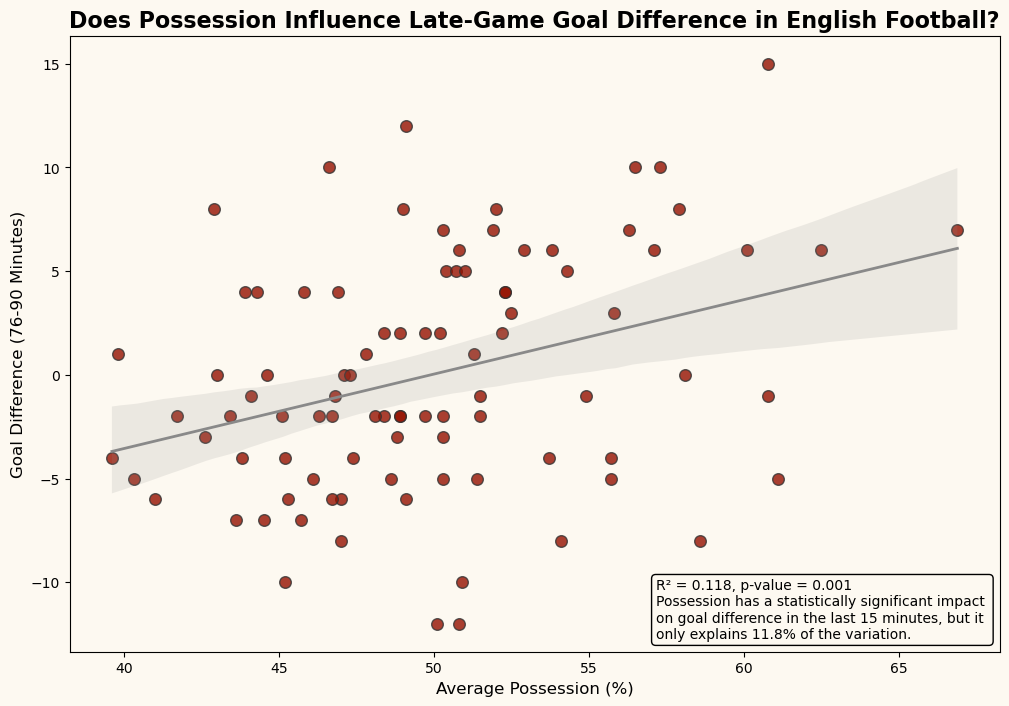

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8), facecolor='#fdf9f1')  

plt.scatter(x, y, color='#941100', edgecolor='#333333', s=70, alpha=0.8)

sns.regplot(x=x, y=y, scatter=False, color='#898989', line_kws={'linewidth': 2})

plt.xlabel("Average Possession (%)", fontsize=12, color='black')
plt.ylabel("Goal Difference (76-90 Minutes)", fontsize=12, color='black')
plt.title("Does Possession Influence Late-Game Goal Difference in English Football?", 
          fontsize=16, color='black', fontweight='bold')

x_max = x.max().item() 
y_min = y.min().item()

text = "R² = 0.118, p-value = 0.001\nPossession has a statistically significant impact \non goal difference in the last 15 minutes, but it \nonly explains 11.8% of the variation."
plt.text(x_max -9.74, y_min -0.7, text, fontsize=10, color='black', 
         bbox=dict(facecolor='#fdf9f1', edgecolor='black', boxstyle='round'))

plt.gca().set_facecolor('#fdf9f1')  
plt.grid(False) 


plt.show()


In [245]:
r_squared = reg.score(x,y)
print(r_squared)

0.11818767919784434


In [248]:
import statsmodels.api as sm

In [250]:
x_const = sm.add_constant(x)

In [252]:
ols_model = sm.OLS(y, x_const).fit()

In [254]:
print(ols_model.summary())

                               OLS Regression Results                              
Dep. Variable:     Goal Difference (76-90)   R-squared:                       0.118
Model:                                 OLS   Adj. R-squared:                  0.108
Method:                      Least Squares   F-statistic:                     12.06
Date:                     Sun, 16 Mar 2025   Prob (F-statistic):           0.000793
Time:                             12:56:27   Log-Likelihood:                -283.99
No. Observations:                       92   AIC:                             572.0
Df Residuals:                           90   BIC:                             577.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------